# Credit Card Fraud Detection 

### Context
In the last decade, there has been an exponential growth of the Internet. This has sparked the proliferation and increse in the use of services such as e-commerce, tap and pay systems, online bills payment systems, etc. the increase on the online payment modes led to an increase on the risk for online frauds.

The use of machine learning methods are adapted on a larger scale to detect and prevent fraud. In this project, I will be implementing machine learning systems that can predict whether a credit card transaction is a fraud or not.

### Dataset
Link to the dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Import Important modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset 

In [2]:
data = pd.read_csv("creditcard.csv")

# Get Information about the dataset 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Removing duplicate entries

In [6]:
data.duplicated().sum()

1081

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(283726, 31)

# Checking Correlation

In [9]:
data.corr().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


# Checking target distribution 

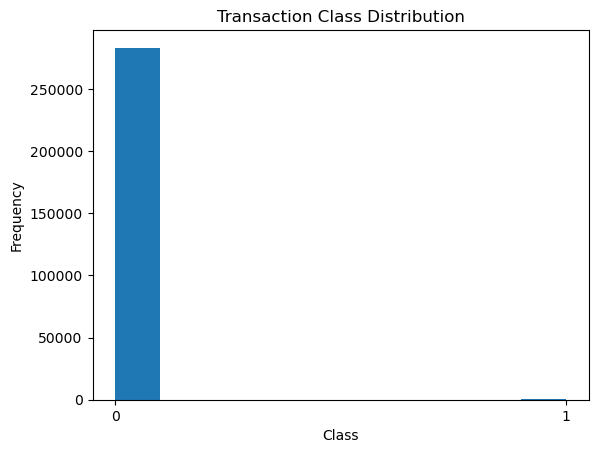

In [10]:
plt.hist(data.Class)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), [0,1])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [11]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

# Data Preparation

In [12]:
# Creating a new dataframe with balanced target data so our model can make accurate predictions
x=data.sample(473,random_state=1)[data['Class']==0]
y=data[data['Class']==1]
new_data=pd.concat([x,y],axis=0)

C:\Users\funme\AppData\Local\Temp\ipykernel_13984\3269851040.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=data.sample(473,random_state=1)[data['Class']==0]


In [13]:
# Split the dataset into train, validation, and test data
x = new_data.drop('Class', axis=1)
y = new_data.Class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
print("size of the train data", x_train.shape, y_train.shape)
print("size of the test data", x_test.shape, y_test.shape)

size of the train data (756, 30) (756,)
size of the test data (190, 30) (190,)


In [15]:
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

# Creating a function to test multiple model effectively

In [16]:
def mymodel(model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    
    tr=model.score(x_train,y_train)
    te=model.score(x_test,y_test)
    
    print(str(model)[:-2],'Accuracy: ',accuracy_score(y_test,ypred),'\nConfusion Matrix: \n',confusion_matrix(y_test,ypred))
    print("Classification report: \n",classification_report(y_test,ypred))
    print(f'Training Accuracy: {tr} \nTesting Accuracy: {te}')
    
    return model

# Models training and evaluation 

#### KNN

In [17]:
knn = mymodel(KNeighborsClassifier())

KNeighborsClassifier Accuracy:  0.8947368421052632 
Confusion Matrix: 
 [[85  3]
 [17 85]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89        88
           1       0.97      0.83      0.89       102

    accuracy                           0.89       190
   macro avg       0.90      0.90      0.89       190
weighted avg       0.90      0.89      0.89       190

Training Accuracy: 0.9259259259259259 
Testing Accuracy: 0.8947368421052632


#### SVC

In [18]:
svc = mymodel(SVC())

SVC Accuracy:  0.9263157894736842 
Confusion Matrix: 
 [[87  1]
 [13 89]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93        88
           1       0.99      0.87      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Training Accuracy: 0.9523809523809523 
Testing Accuracy: 0.9263157894736842


#### Decision Tree

In [19]:
dt = mymodel(DecisionTreeClassifier())

DecisionTreeClassifier Accuracy:  0.9052631578947369 
Confusion Matrix: 
 [[80  8]
 [10 92]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        88
           1       0.92      0.90      0.91       102

    accuracy                           0.91       190
   macro avg       0.90      0.91      0.90       190
weighted avg       0.91      0.91      0.91       190

Training Accuracy: 1.0 
Testing Accuracy: 0.9052631578947369


#### Naive Bayes

In [20]:
gnb = mymodel(GaussianNB())

GaussianNB Accuracy:  0.9157894736842105 
Confusion Matrix: 
 [[86  2]
 [14 88]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91        88
           1       0.98      0.86      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

Training Accuracy: 0.9166666666666666 
Testing Accuracy: 0.9157894736842105


#### Logistic Regression

In [21]:
lr = mymodel(LogisticRegression())

LogisticRegression Accuracy:  0.9263157894736842 
Confusion Matrix: 
 [[83  5]
 [ 9 93]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        88
           1       0.95      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Training Accuracy: 0.9497354497354498 
Testing Accuracy: 0.9263157894736842


Logistic regression is giving the best accuracy with lowest recall and False positive. In addition, the training and testing accuracy doesnt have a huge difference.
Logistic regression is the best model!

# Let's try using all the data

In [22]:
# Split the dataset into train, validation, and test data
x = data.drop('Class', axis=1)
y = data.Class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### KNN Model

In [23]:
knn = mymodel(KNeighborsClassifier())

KNeighborsClassifier Accuracy:  0.9984844746766292 
Confusion Matrix: 
 [[56656     0]
 [   86     4]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       1.00      0.04      0.09        90

    accuracy                           1.00     56746
   macro avg       1.00      0.52      0.54     56746
weighted avg       1.00      1.00      1.00     56746

Training Accuracy: 0.9984183628513525 
Testing Accuracy: 0.9984844746766292


#### SVC

In [24]:
svc = mymodel(SVC())

SVC Accuracy:  0.998413985126705 
Confusion Matrix: 
 [[56656     0]
 [   90     0]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.00      0.00      0.00        90

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746

Training Accuracy: 0.9983126266631421 
Testing Accuracy: 0.998413985126705


C:\Users\funme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\funme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\funme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [25]:
dt = mymodel(DecisionTreeClassifier())

DecisionTreeClassifier Accuracy:  0.9989602791386177 
Confusion Matrix: 
 [[56622    34]
 [   25    65]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.66      0.72      0.69        90

    accuracy                           1.00     56746
   macro avg       0.83      0.86      0.84     56746
weighted avg       1.00      1.00      1.00     56746

Training Accuracy: 1.0 
Testing Accuracy: 0.9989602791386177


#### Naive Bayes

In [26]:
gnb = mymodel(GaussianNB())

GaussianNB Accuracy:  0.9928629330701724 
Confusion Matrix: 
 [[56291   365]
 [   40    50]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56656
           1       0.12      0.56      0.20        90

    accuracy                           0.99     56746
   macro avg       0.56      0.77      0.60     56746
weighted avg       1.00      0.99      1.00     56746

Training Accuracy: 0.993563309542691 
Testing Accuracy: 0.9928629330701724


#### Logistic Regression

In [27]:
lr = mymodel(LogisticRegression())

LogisticRegression Accuracy:  0.9989779015260988 
Confusion Matrix: 
 [[56631    25]
 [   33    57]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.70      0.63      0.66        90

    accuracy                           1.00     56746
   macro avg       0.85      0.82      0.83     56746
weighted avg       1.00      1.00      1.00     56746

Training Accuracy: 0.9989162040708432 
Testing Accuracy: 0.9989779015260988


C:\Users\funme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Artificial Neural Network Model

In [28]:
# Split the dataset into train, validation, and test data
x = data.drop('Class', axis=1)
y = data.Class
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [29]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [30]:
METRICS = [
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

In [31]:
model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

In [33]:
callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]

In [34]:
history = model.fit(x_train, y_train, validation_data=(x_validate, y_validate), batch_size=2048, epochs=300, callbacks=callbacks)

Epoch 1/300
78/78 [==============================] - 4s 27ms/step - loss: 0.8135 - fn: 137.0000 - fp: 75494.0000 - tn: 83126.0000 - tp: 129.0000 - precision: 0.0017 - recall: 0.4850 - val_loss: 0.8557 - val_fn: 27.0000 - val_fp: 32130.0000 - val_tn: 7519.0000 - val_tp: 46.0000 - val_precision: 0.0014 - val_recall: 0.6301
Epoch 2/300
78/78 [==============================] - 1s 14ms/step - loss: 0.6995 - fn: 157.0000 - fp: 63679.0000 - tn: 94941.0000 - tp: 109.0000 - precision: 0.0017 - recall: 0.4098 - val_loss: 0.6991 - val_fn: 52.0000 - val_fp: 17970.0000 - val_tn: 21679.0000 - val_tp: 21.0000 - val_precision: 0.0012 - val_recall: 0.2877
Epoch 3/300
78/78 [==============================] - 1s 16ms/step - loss: 0.6237 - fn: 182.0000 - fp: 51999.0000 - tn: 106621.0000 - tp: 84.0000 - precision: 0.0016 - recall: 0.3158 - val_loss: 0.5645 - val_fn: 73.0000 - val_fp: 16.0000 - val_tn: 39633.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/300
78/78 [==

Epoch 49/300
78/78 [==============================] - 1s 14ms/step - loss: 0.0140 - fn: 266.0000 - fp: 4.0000 - tn: 158616.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0135 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 50/300
78/78 [==============================] - 1s 15ms/step - loss: 0.0144 - fn: 266.0000 - fp: 4.0000 - tn: 158616.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0136 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 51/300
78/78 [==============================] - 1s 16ms/step - loss: 0.0140 - fn: 266.0000 - fp: 0.0000e+00 - tn: 158620.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0134 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0

Epoch 73/300
78/78 [==============================] - 1s 15ms/step - loss: 0.0138 - fn: 266.0000 - fp: 2.0000 - tn: 158618.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0129 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 74/300
78/78 [==============================] - 1s 16ms/step - loss: 0.0137 - fn: 266.0000 - fp: 2.0000 - tn: 158618.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0129 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 75/300
78/78 [==============================] - 1s 15ms/step - loss: 0.0127 - fn: 265.0000 - fp: 3.0000 - tn: 158617.0000 - tp: 1.0000 - precision: 0.2500 - recall: 0.0038 - val_loss: 0.0129 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_re

Epoch 121/300
78/78 [==============================] - 1s 15ms/step - loss: 0.0120 - fn: 264.0000 - fp: 4.0000 - tn: 158616.0000 - tp: 2.0000 - precision: 0.3333 - recall: 0.0075 - val_loss: 0.0134 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 122/300
78/78 [==============================] - 1s 16ms/step - loss: 0.0111 - fn: 258.0000 - fp: 6.0000 - tn: 158614.0000 - tp: 8.0000 - precision: 0.5714 - recall: 0.0301 - val_loss: 0.0129 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 123/300
78/78 [==============================] - 1s 16ms/step - loss: 0.0111 - fn: 253.0000 - fp: 11.0000 - tn: 158609.0000 - tp: 13.0000 - precision: 0.5417 - recall: 0.0489 - val_loss: 0.0116 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Ep

Epoch 146/300
78/78 [==============================] - 1s 15ms/step - loss: 0.0087 - fn: 193.0000 - fp: 28.0000 - tn: 158592.0000 - tp: 73.0000 - precision: 0.7228 - recall: 0.2744 - val_loss: 0.0080 - val_fn: 64.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 9.0000 - val_precision: 1.0000 - val_recall: 0.1233
Epoch 147/300
78/78 [==============================] - 1s 15ms/step - loss: 0.0095 - fn: 205.0000 - fp: 28.0000 - tn: 158592.0000 - tp: 61.0000 - precision: 0.6854 - recall: 0.2293 - val_loss: 0.0089 - val_fn: 69.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 4.0000 - val_precision: 1.0000 - val_recall: 0.0548
Epoch 148/300
78/78 [==============================] - 1s 15ms/step - loss: 0.0091 - fn: 204.0000 - fp: 23.0000 - tn: 158597.0000 - tp: 62.0000 - precision: 0.7294 - recall: 0.2331 - val_loss: 0.0065 - val_fn: 53.0000 - val_fp: 2.0000 - val_tn: 39647.0000 - val_tp: 20.0000 - val_precision: 0.9091 - val_recall: 0.2740
Epoch 149/300
78/78 [================

78/78 [==============================] - 1s 18ms/step - loss: 0.0090 - fn: 198.0000 - fp: 34.0000 - tn: 158586.0000 - tp: 68.0000 - precision: 0.6667 - recall: 0.2556 - val_loss: 0.0130 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 197/300
78/78 [==============================] - 1s 18ms/step - loss: 0.0099 - fn: 227.0000 - fp: 19.0000 - tn: 158601.0000 - tp: 39.0000 - precision: 0.6724 - recall: 0.1466 - val_loss: 0.0118 - val_fn: 73.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 198/300
78/78 [==============================] - 1s 17ms/step - loss: 0.0102 - fn: 232.0000 - fp: 20.0000 - tn: 158600.0000 - tp: 34.0000 - precision: 0.6296 - recall: 0.1278 - val_loss: 0.0431 - val_fn: 67.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 6.0000 - val_precision: 1.0000 - val_recall: 0.0822
Epoch 199/300
78/78 [===

78/78 [==============================] - 1s 18ms/step - loss: 0.0056 - fn: 129.0000 - fp: 33.0000 - tn: 158587.0000 - tp: 137.0000 - precision: 0.8059 - recall: 0.5150 - val_loss: 0.0239 - val_fn: 36.0000 - val_fp: 4.0000 - val_tn: 39645.0000 - val_tp: 37.0000 - val_precision: 0.9024 - val_recall: 0.5068
Epoch 295/300
78/78 [==============================] - 1s 16ms/step - loss: 0.0069 - fn: 172.0000 - fp: 24.0000 - tn: 158596.0000 - tp: 94.0000 - precision: 0.7966 - recall: 0.3534 - val_loss: 0.0090 - val_fn: 61.0000 - val_fp: 0.0000e+00 - val_tn: 39649.0000 - val_tp: 12.0000 - val_precision: 1.0000 - val_recall: 0.1644
Epoch 296/300
78/78 [==============================] - 1s 17ms/step - loss: 0.0064 - fn: 147.0000 - fp: 36.0000 - tn: 158584.0000 - tp: 119.0000 - precision: 0.7677 - recall: 0.4474 - val_loss: 0.0056 - val_fn: 30.0000 - val_fp: 4.0000 - val_tn: 39645.0000 - val_tp: 43.0000 - val_precision: 0.9149 - val_recall: 0.5890
Epoch 297/300
78/78 [==============================

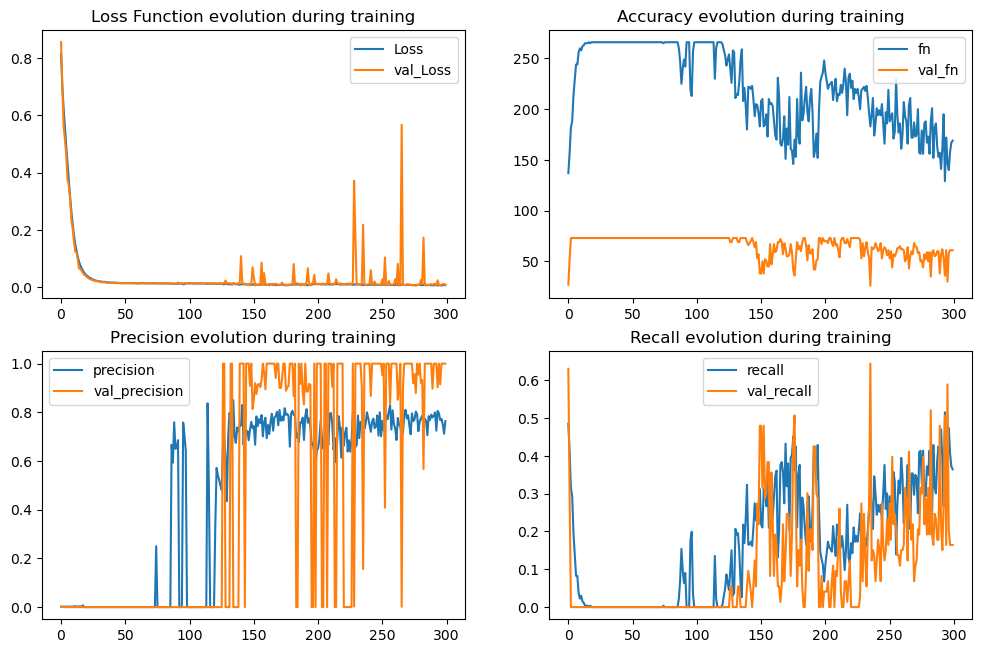

In [36]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['fn'], label='fn')
plt.plot(history.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()